##### Prompt photons in data: 
##### (1) Trigger HLT_Photon_200
##### (2) pfMet > 150 GeV
##### (3) anti phi cuts - i.e. none of hte photons to be in the +-pi, 0 regions
##### (4) H/E < 0.0260
##### (5) phoChwiso < 1.146
##### (6) Select the highest pT photon

##### =================================
##### Beam halo in data:
##### (1) Trigger HLT_Photon_200
##### (2) pfMet > 150 GeV
##### (3) Phi cuts, i.e. photon should lie in the +/-pi, 0 regions. Here is a small snippet: 
##### ` if( ( (fabs(phoPhi[phoSelInd])>2.9 && fabs(phoPhi[phoSelInd]) < 3.) || (fabs(phoPhi[phoSelInd])>0 && fabs(phoPhi[phoSelInd])<0.2) ) )
    foundBH = true; ` 

In [1]:
import uproot
import numpy as np
import pandas as pd
import root_numpy as rp
import matplotlib.pyplot as plt

Welcome to JupyROOT 6.16/00


In [2]:
fName='root://cmseos.fnal.gov//store/user/sghosh/FROMSHILPIDI/anTGCtree_data_photon.root'
#fName='root://cmseos.fnal.gov//store/user/sghosh/FROMSHILPIDI/anTGCtree_MC_beamhalo.root'
tree = uproot.open(fName,xrootdsource=dict(chunkbytes=1024**3, limitbytes=1024**3))['ggNtuplizer/EventTree']

In [3]:
tree.keys()
#df=tree.pandas.df(['ebrhE','ebrhiEta','ebrhiPhi'])

[b'run',
 b'event',
 b'lumis',
 b'nVtx',
 b'nGoodVtx',
 b'isPVGood',
 b'vtx',
 b'vty',
 b'vtz',
 b'rho',
 b'rhoCentral',
 b'HLTEleMuX',
 b'HLTPho',
 b'HLTPhoRejectedByPS',
 b'HLTJet',
 b'HLTEleMuXIsPrescaled',
 b'HLTPhoIsPrescaled',
 b'HLTJetIsPrescaled',
 b'beamHaloSummary',
 b'metFilters',
 b'pfMET',
 b'pfMETPhi',
 b'pfMET_T1JERUp',
 b'pfMET_T1JERDo',
 b'pfMET_T1JESUp',
 b'pfMET_T1JESDo',
 b'pfMET_T1UESUp',
 b'pfMET_T1UESDo',
 b'pfMETPhi_T1JESUp',
 b'pfMETPhi_T1JESDo',
 b'pfMETPhi_T1UESUp',
 b'pfMETPhi_T1UESDo',
 b'pfMET_metSig',
 b'pfMET_EtSig',
 b'nPho',
 b'phoE',
 b'phoSigmaE',
 b'phoEt',
 b'phoEta',
 b'phoPhi',
 b'phoCalibE',
 b'phoSigmaCalibE',
 b'phoCalibEt',
 b'phoSCindex',
 b'phoESEnP1',
 b'phoESEnP2',
 b'phoFiducialRegion',
 b'phoQualityBits',
 b'phoR9',
 b'phoHoverE',
 b'phoESEffSigmaRR',
 b'phoSigmaIEtaIEtaFull5x5',
 b'phoSigmaIEtaIPhiFull5x5',
 b'phoSigmaIPhiIPhiFull5x5',
 b'phoE2x2Full5x5',
 b'phoE5x5Full5x5',
 b'phoR9Full5x5',
 b'phoSeedBCE',
 b'phoSeedBCEta',
 b'phoPFC

In [6]:
branches = ['eerhE','eerhiEta','eerhiPhi','pfMET','phoE','phoEta','phoPhi','phoHoverE','phoPFChWorstIso','HLTPho','eerhEta']
#branches = ['HLTPho']
#branches = ['eerhE','eerhiEta','eerhiPhi','pfMET','phoE','phoEta','phoPhi','phoHoverE','phoPFChWorstIso','HLTPho']
#dictn = tree.arrays(branches=branches,entrystart=0, entrystop=300)
dictn = tree.arrays(branches=branches)

In [7]:
dfs = pd.DataFrame.from_dict(dictn)
dfs.columns=branches
phoindex = 0 #0 for the highest enegetic photon
dfs['HLTdecision']=dfs['HLTPho'].apply(lambda x : (x>>9)&1)
dfs['phoE']=dfs['phoE'].apply(pd.Series)[phoindex]
dfs['phoEta']=dfs['phoEta'].apply(pd.Series)[phoindex]
dfs['phoPhi']=dfs['phoPhi'].apply(pd.Series)[phoindex]
dfs['phoHoverE']=dfs['phoHoverE'].apply(pd.Series)[phoindex]
dfs['phoPFChWorstIso']=dfs['phoPFChWorstIso'].apply(pd.Series)[phoindex]
dfs['eerhEmax']=dfs['eerhE'].apply(lambda x : np.max(x))


#dfs['BINMATCH']=dfs['BIN'].apply(lambda x : bin(x)>>8&1)
#photoncut = (dfs['pfMET'] > 150.0)&(dfs['HLTdecision'] ==1)&(dfs['phoHoverE'] < 0.0260)&(dfs['phoPFChWorstIso'] < 1.146)&(abs(dfs['phoEta']) > 1.479)


In [8]:
#photoncut = (dfs['pfMET'] > 150.0)&(dfs['HLTdecision'] ==1)&(dfs['phoHoverE'] < 0.0260)&(dfs['phoPFChWorstIso'] < 1.146)&(abs(dfs['phoEta']) > 1.479)&(((abs(dfs['phoPhi'])<2.9)&(abs(dfs['phoPhi'])>3.0))|((abs(dfs['phoPhi'])<0)&(abs(dfs['phoPhi'])>0.2)))
#halocut = (dfs['pfMET'] > 150.0)&(dfs['HLTdecision'] ==1)&(abs(dfs['phoEta']) > 1.479)&(((abs(dfs['phoPhi'])>2.9)&(abs(dfs['phoPhi'])<3.0))|((abs(dfs['phoPhi'])>0)&(abs(dfs['phoPhi'])<0.2))) 
#photoncut = (dfs['pfMET'] > 150.0)&(dfs['HLTdecision'] ==1)

#photoncut = (dfs['pfMET'] > 150.0)&(dfs['HLTdecision'] ==1)&(dfs['phoHoverE'] < 0.0260)&(dfs['phoPFChWorstIso'] < 1.146)&(abs(dfs['phoEta']) > 1.566)&(((abs(dfs['phoPhi'])<2.9)&(abs(dfs['phoPhi'])>3.0))|((abs(dfs['phoPhi'])<0)&(abs(dfs['phoPhi'])>0.2)))
#photoncut = (dfs['pfMET'] > 150.0)&(dfs['HLTdecision'] ==1)&(dfs['phoHoverE'] < 0.0260)&(dfs['phoPFChWorstIso'] < 1.146)&(abs(dfs['phoEta']) > 1.566)
#dfs = dfs.loc[photoncut]
dfs
#dfs = pd.DataFrame.from_dict(dictn)
#dfs.columns=branches
#dfs

,eerhE,eerhiEta,eerhiPhi,pfMET,phoE,phoEta,phoPhi,phoHoverE,phoPFChWorstIso,HLTPho,eerhEta,HLTdecision,eerhEmax
0,"[0.57353705, 0.391716, 0.68435425, 0.37050915,...","[4, 10, 10, 12, 16, 18, 21, 25, 27, 27, 29, 29...","[57, 63, 64, 62, 85, 55, 33, 27, 26, 40, 66, 6...",32.713936,291.513000,-1.713086,-0.303424,0.019184,36.684589,48,"[-1.5609496, -1.6603733, -1.653893, -1.7095982...",0,59.945774
1,"[0.6955372, 0.09417033, 0.91770214, 0.39654475...","[18, 19, 22, 23, 23, 24, 25, 27, 30, 32, 34, 3...","[55, 53, 35, 23, 24, 33, 33, 78, 67, 55, 52, 4...",11.078247,65.994324,-0.938932,1.169271,0.000000,2.043715,4,"[-1.9023602, -1.9384148, -1.913024, -1.7416434...",0,7.685011
2,"[0.32794386, 0.94326013, 0.64967257, 0.6385538...","[5, 6, 9, 9, 12, 21, 22, 23, 23, 24, 27, 29, 3...","[46, 46, 63, 72, 64, 85, 61, 60, 61, 67, 55, 4...",38.134724,38.519413,-0.430837,0.296694,0.000000,10.476214,4,"[-1.5850518, -1.6038513, -1.6386642, -1.571891...",0,17.807323
3,"[0.47662258, 0.702888, 0.22698133, 0.9168724, ...","[4, 9, 13, 15, 20, 21, 21, 21, 23, 23, 26, 26,...","[38, 64, 21, 69, 18, 55, 56, 57, 35, 64, 9, 37...",35.813717,77.277908,1.305593,-2.224039,0.000000,17.180647,4,"[-1.5375874, -1.6324531, -1.5500665, -1.717730...",0,24.458019
4,"[0.6247256, 1.0208958, 0.0, 0.4715734, 0.37173...","[7, 8, 8, 8, 13, 14, 15, 16, 23, 26, 32, 32, 3...","[65, 26, 62, 63, 76, 76, 82, 82, 54, 44, 59, 7...",29.399672,321.752625,-0.217644,1.786662,0.000000,22.164885,2560,"[-1.5847336, -1.5229937, -1.6229625, -1.617385...",1,17.468464
5,"[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.3501373,...","[1, 1, 1, 1, 2, 3, 4, 5, 5, 5, 6, 6, 6, 6, 6, ...","[41, 43, 44, 45, 41, 41, 41, 36, 37, 52, 26, 2...",33.131294,118.866989,-1.660743,-2.821559,0.000000,20.203369,4,"[-1.4921757, -1.4983203, -1.500908, -1.5031652...",0,75.481010
6,"[0.20157747, 0.03947524, 0.66689885, 0.6163243...","[4, 5, 9, 9, 10, 11, 19, 22, 23, 23, 24, 24, 2...","[39, 65, 31, 32, 31, 61, 68, 41, 54, 89, 41, 4...",43.784824,36.024677,-0.317734,1.587080,0.000000,3.664182,4,"[-1.5423299, -1.548306, -1.5852662, -1.593674,...",0,21.817509
7,"[0.37908202, 5.9351435, 0.5363056, 0.28306776,...","[20, 21, 21, 21, 21, 21, 21, 22, 22, 22, 23, 2...","[70, 52, 53, 54, 67, 68, 70, 50, 70, 72, 19, 4...",77.161690,229.489212,1.155070,2.364793,0.000000,10.989570,17179869184,"[-1.8147056, -2.0031998, -2.001216, -1.9981825...",0,40.598221
8,"[0.0, 0.093686834, 0.55913424, 0.6882529, 0.90...","[1, 1, 9, 17, 19, 19, 21, 22, 23, 24, 25, 28, ...","[45, 57, 21, 65, 59, 60, 42, 59, 60, 69, 28, 5...",16.769018,40.250263,-0.312373,2.611392,0.020155,6.658975,4,"[-1.5031652, -1.5017447, -1.490953, -1.8027072...",0,33.499947
9,"[0.0, 0.64642316, 0.6170383, 0.58048517, 0.749...","[6, 10, 15, 16, 16, 17, 17, 20, 22, 22, 23, 24...","[71, 55, 67, 31, 69, 67, 68, 37, 37, 44, 37, 3...",25.593584,82.059570,-1.182063,-0.979981,0.000000,16.392530,4,"[-1.525224, -1.6947883, -1.7383859, -1.7209783...",0,12.875604


In [14]:
#dfs = pd.DataFrame.from_dict(dictn, dtype=np.float16)
#dfs.columns=branches
#photoncut = (dfs['pfMET'] > 150.0)&()
#dfs = dfs.loc[photoncut]
#dfs

In [9]:
#dfs = pd.DataFrame.from_dict(dictn, dtype=np.float16)
#dfs.columns=branches
#dfs #each columns are arrays
#print (dfs.columns)
nevents = dfs.shape[0]
#print ("total events: ",nevents)
#print (dfs.iloc[0])
#print (dfs.values.shape)
#len(dfs['ebrhE'][0])
#print (dfs['eerhE'][0])
#print (dfs['eerhiEta'][0])
#print (dfs['eerhiPhi'][0])
print (nevents)
dfs = dfs.reset_index(drop=True)
dfs
#dfs['eerhiEta']

16223


,eerhE,eerhiEta,eerhiPhi,pfMET,phoE,phoEta,phoPhi,phoHoverE,phoPFChWorstIso,HLTPho,eerhEta,HLTdecision,eerhEmax
0,"[0.57353705, 0.391716, 0.68435425, 0.37050915,...","[4, 10, 10, 12, 16, 18, 21, 25, 27, 27, 29, 29...","[57, 63, 64, 62, 85, 55, 33, 27, 26, 40, 66, 6...",32.713936,291.513000,-1.713086,-0.303424,0.019184,36.684589,48,"[-1.5609496, -1.6603733, -1.653893, -1.7095982...",0,59.945774
1,"[0.6955372, 0.09417033, 0.91770214, 0.39654475...","[18, 19, 22, 23, 23, 24, 25, 27, 30, 32, 34, 3...","[55, 53, 35, 23, 24, 33, 33, 78, 67, 55, 52, 4...",11.078247,65.994324,-0.938932,1.169271,0.000000,2.043715,4,"[-1.9023602, -1.9384148, -1.913024, -1.7416434...",0,7.685011
2,"[0.32794386, 0.94326013, 0.64967257, 0.6385538...","[5, 6, 9, 9, 12, 21, 22, 23, 23, 24, 27, 29, 3...","[46, 46, 63, 72, 64, 85, 61, 60, 61, 67, 55, 4...",38.134724,38.519413,-0.430837,0.296694,0.000000,10.476214,4,"[-1.5850518, -1.6038513, -1.6386642, -1.571891...",0,17.807323
3,"[0.47662258, 0.702888, 0.22698133, 0.9168724, ...","[4, 9, 13, 15, 20, 21, 21, 21, 23, 23, 26, 26,...","[38, 64, 21, 69, 18, 55, 56, 57, 35, 64, 9, 37...",35.813717,77.277908,1.305593,-2.224039,0.000000,17.180647,4,"[-1.5375874, -1.6324531, -1.5500665, -1.717730...",0,24.458019
4,"[0.6247256, 1.0208958, 0.0, 0.4715734, 0.37173...","[7, 8, 8, 8, 13, 14, 15, 16, 23, 26, 32, 32, 3...","[65, 26, 62, 63, 76, 76, 82, 82, 54, 44, 59, 7...",29.399672,321.752625,-0.217644,1.786662,0.000000,22.164885,2560,"[-1.5847336, -1.5229937, -1.6229625, -1.617385...",1,17.468464
5,"[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.3501373,...","[1, 1, 1, 1, 2, 3, 4, 5, 5, 5, 6, 6, 6, 6, 6, ...","[41, 43, 44, 45, 41, 41, 41, 36, 37, 52, 26, 2...",33.131294,118.866989,-1.660743,-2.821559,0.000000,20.203369,4,"[-1.4921757, -1.4983203, -1.500908, -1.5031652...",0,75.481010
6,"[0.20157747, 0.03947524, 0.66689885, 0.6163243...","[4, 5, 9, 9, 10, 11, 19, 22, 23, 23, 24, 24, 2...","[39, 65, 31, 32, 31, 61, 68, 41, 54, 89, 41, 4...",43.784824,36.024677,-0.317734,1.587080,0.000000,3.664182,4,"[-1.5423299, -1.548306, -1.5852662, -1.593674,...",0,21.817509
7,"[0.37908202, 5.9351435, 0.5363056, 0.28306776,...","[20, 21, 21, 21, 21, 21, 21, 22, 22, 22, 23, 2...","[70, 52, 53, 54, 67, 68, 70, 50, 70, 72, 19, 4...",77.161690,229.489212,1.155070,2.364793,0.000000,10.989570,17179869184,"[-1.8147056, -2.0031998, -2.001216, -1.9981825...",0,40.598221
8,"[0.0, 0.093686834, 0.55913424, 0.6882529, 0.90...","[1, 1, 9, 17, 19, 19, 21, 22, 23, 24, 25, 28, ...","[45, 57, 21, 65, 59, 60, 42, 59, 60, 69, 28, 5...",16.769018,40.250263,-0.312373,2.611392,0.020155,6.658975,4,"[-1.5031652, -1.5017447, -1.490953, -1.8027072...",0,33.499947
9,"[0.0, 0.64642316, 0.6170383, 0.58048517, 0.749...","[6, 10, 15, 16, 16, 17, 17, 20, 22, 22, 23, 24...","[71, 55, 67, 31, 69, 67, 68, 37, 37, 44, 37, 3...",25.593584,82.059570,-1.182063,-0.979981,0.000000,16.392530,4,"[-1.525224, -1.6947883, -1.7383859, -1.7209783...",0,12.875604


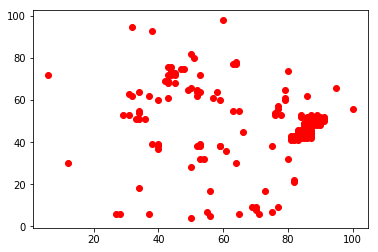

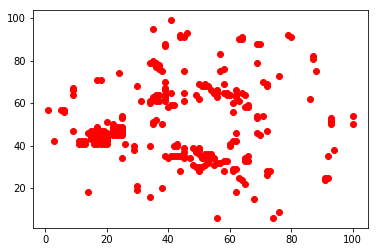

In [32]:
%matplotlib inline
for i in range(0,nevents):
    
    plt.plot(dfs['eerhiEta'][i],dfs['eerhiPhi'][i],'ro')
    plt.show()

In [9]:
#import matplotlib.pyplot as plt
#import numpy as np
# if using a Jupyter notebook, includue:
#%matplotlib inline
#plt.hist(residuals, bins=100,range=(-1,1))
#plt.xlabel('residual value')
import ROOT

In [ ]:
def make_nparray(nev):
    histo_2d = ROOT.TH2F("histo_2d", "X vs Y", 11, -5, 6, 11, -5, 6)
    imax = np.argmax(dfs['eerhE'][nev])
    print ("max energy",dfs['eerhE'][nev][imax])
    maxval = dfs['eerhE'][nev][imax]
    print ("max index=",imax," ieta:",dfs['eerhiEta'][nev][imax]," iphi:",dfs['eerhiPhi'][nev][imax]) 
    ietamax = int(dfs['eerhiEta'][nev][imax])
    iphimax = int(dfs['eerhiPhi'][nev][imax])
    
    zsideindex = (dfs['eerhEta'][nev][imax])
    print ("zside value:",zsideindex)
    print (len(dfs['eerhE'][nev]),len(dfs['eerhiEta'][nev]),len(dfs['eerhiPhi'][nev]),len(dfs['eerhEta'][nev]))
    nm=0
    nnm=0
    for i in range(len(dfs['eerhE'][nev])):
        if (np.sign(zsideindex) != np.sign(dfs['eerhEta'][nev][i])):
            print ()
            print ("no sign match")
            nm += 1
            continue
        print ("sign match")
        nnm += 1
#for checks print e,eta,phi for selected event        
#        if (nev==1):
#            print ("energy :",dfs['eerhE'][nev][i],"ieta :",dfs['eerhiEta'][nev][i],"iphi :",dfs['eerhiPhi'][nev][i])
        binh = histo_2d.GetBin(histo_2d.GetXaxis().FindBin(int(dfs['eerhiEta'][nev][i]-ietamax)),histo_2d.GetYaxis().FindBin(int(dfs['eerhiPhi'][nev][i]-iphimax)))
#        histo_2d.SetBinContent(binh,dfs['eerhE'][nev][i]/maxval) #if normalized by max
        histo_2d.SetBinContent(binh,dfs['eerhE'][nev][i])
    
    print ("total sign match",nm)
    print ("total sign mismatch",nnm)
    return rp.hist2array(histo_2d, include_overflow=False, copy=True, return_edges=False)
        
#c = ROOT.TCanvas("myCanvasName","The Canvas Title",800,600)
#histo_2d.Draw("COLZ")
#ROOT.enableJSVis()
#c.Draw()
#ROOT.disableJSVis()

In [ ]:
#nev
listarr = []
for i in range(1):
    listarr.append(make_nparray(i))
#listarr
np_arr = np.array(listarr)
np_arr.shape
#np_arr[np_arr < 10] = 0 # if required thresholding

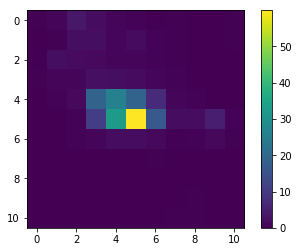

In [29]:
for i in range(np_arr.shape[0]):
    plt.imshow(np_arr[i])
    plt.colorbar()
    plt.show()

In [ ]:
#testarr.shape
#testarr[testarr < 10] = 0
#testarr

In [54]:
#import matplotlib.pyplot as plt
#import numpy as np
# if using a Jupyter notebook, includue:
#%matplotlib inline
#plt.imshow(histarr)
#plt.xlabel('residual value')

NameError: name 'histarr' is not defined

In [ ]:
#a = np.array([[1,2,3],[4,5,6],[7,8,9]])

#for t in range(0,10):
#    plt.imshow(a)
    #plt.show()

In [ ]:
a=[1,2,3]
for i in a:
    print (i)
    
    